# literarystyle
## Exploration of Source Style within the News Corpus - UML Course Project

*When analyzing word frequencies, one often makes the following assumptions:* 
    
   1- The style of an author remains the same throughout his/her life 
    
   2- Successive occurrences of [function words](https://en.wikipedia.org/wiki/Function_word) are independent

Because function words have little contextual meaning, we can think of them abstractly as
the “noise” of language. writers do not put as much conscious thought into this aspect of writing. 

when choosing the unit of analysis, one must use something that has large variation across authors and relatively little variation among an author’s own works. 

 sentence length tended not to vary much within an
author’s writings, it also did not vary much between authors.

groups of function word counts
serve as a good numerical expressions of the stylistic habits of authors. Examining function words in their original locations is not very useful because on smaller
scales their occurrences do not appear to be independent

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import viridis
import seaborn as sns
% matplotlib inline

# Import stopwords with nltk.
from nltk.corpus import stopwords
import nltk
stop = stopwords.words('english')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

In [2]:
article_df = pd.concat([pd.read_csv('articles1.csv'),
                        pd.read_csv('articles2.csv'),
                        pd.read_csv('articles3.csv')], axis=0)
article_df.shape

(142570, 10)

In [3]:
article_df.columns

Index(['Unnamed: 0', 'id', 'title', 'publication', 'author', 'date', 'year',
       'month', 'url', 'content'],
      dtype='object')

In [4]:
# Drop unnecessary columns for us
article_df = article_df.drop(['date','Unnamed: 0', 'month', 'year', 'url'],axis=1)

In [5]:
for c in article_df.columns:
    print("# of empty cell in column {}: {}".format(c,len(article_df[article_df[c].isnull()]))) 

# of empty cell in column id: 0
# of empty cell in column title: 2
# of empty cell in column publication: 0
# of empty cell in column author: 15876
# of empty cell in column content: 0


In [6]:
# Data cleaning and imputation
article_df['author'] = article_df.author.fillna('Other')
article_df['title'] = article_df.title.fillna('No Title')

In [7]:
for c in article_df.columns:
    print("# of empty cell in column {}: {}".format(c,len(article_df[article_df[c].isnull()]))) 

# of empty cell in column id: 0
# of empty cell in column title: 0
# of empty cell in column publication: 0
# of empty cell in column author: 0
# of empty cell in column content: 0


In [8]:
print(article_df.shape)
article_df.dtypes

(142570, 5)


id              int64
title          object
publication    object
author         object
content        object
dtype: object

### Train, Dev and Test Split

In [78]:
np.random.seed(123)
train, validate, test = np.split(article_df.sample(frac=1), 
                                 [int(.6*len(article_df)), 
                                  int(.8*len(article_df))])
print("Train shape: {} \nDev shape: {} \nTest shape: {}".format(train.shape,validate.shape,test.shape))

Train shape: (85542, 7) 
Dev shape: (28514, 7) 
Test shape: (28514, 7)


In [79]:
train = article_df

### Data Exploration

In [15]:
train.head(1)

,id,title,publication,author,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,WASHINGTON — Congressional Republicans have...


In [16]:
# Word Counts in title and content
train['title_count'] = train['title'].str.lower().str.split().apply(set).apply(len)#.sort_values(ascending=False)
train['content_count'] = train['content'].str.lower().str.split().apply(set).apply(len)#.sort_values(ascending=False)
train.head()

,id,title,publication,author,content,title_count,content_count
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,WASHINGTON — Congressional Republicans have...,14,422
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,"After the bullet shells get counted, the blood...",16,1673
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,"When Walt Disney’s “Bambi” opened in 1942, cri...",16,1071
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,"Death may be the great equalizer, but it isn’t...",14,1127
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,"SEOUL, South Korea — North Korea’s leader, ...",16,335


In [17]:
train.groupby(['publication'])['title_count'].agg(['mean']).sort_values('mean', ascending=False)

,mean
publication,
New York Times,14.296681
Business Insider,13.232204
Breitbart,12.006223
Vox,11.734384
Washington Post,11.199028
Guardian,11.044580
Buzzfeed News,10.825917
Fox News,10.326137
NPR,10.057372


In [40]:
author_title_df =  train.groupby(['author'])['title_count'].agg(['mean'])#.nlargest(50,'mean')
# least_author_title_df =  train.groupby(['author'])['title_count'].agg(['mean'])#.nsmallest(50,'mean')
# author_title_df = pd.concat([top_author_title_df, least_author_title_df], axis=0)
# author_title_df.head()

In [42]:
top_author_content_df =  train.groupby(['author'])['content_count'].agg(['mean'])#.nlargest(50,'mean')
# least_author_content_df =  train.groupby(['author'])['content_count'].agg(['mean'])#.nsmallest(50,'mean')
# author_content_df = pd.concat([top_author_content_df, least_author_content_df], axis=0)
# author_content_df.head()

Text(0.5,1,'Bar Plot for Content Lenghts across News Sources')

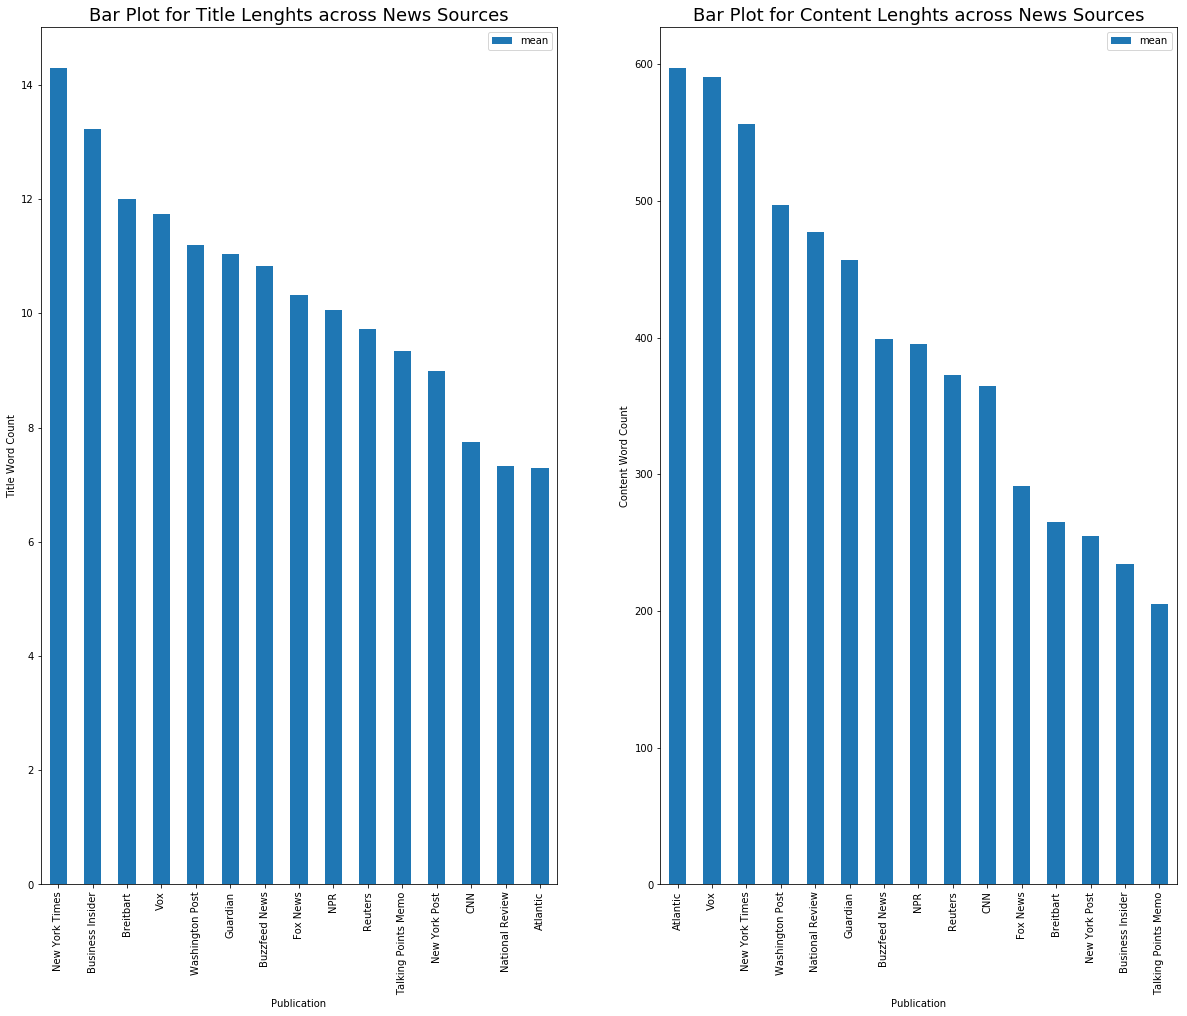

In [22]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(16.5, 12.5)
fig.tight_layout()
fig.subplots_adjust(hspace = 0.2, wspace = 0.2)

train.groupby(['publication'])['title_count'].agg(['mean']).sort_values('mean', 
                                                                        ascending=False).plot(kind='bar',
                                                                                              ax=axes[0])
axes[0].set_xlabel('Publication')
axes[0].set_ylabel('Title Word Count')
axes[0].set_title('Bar Plot for Title Lenghts across News Sources', fontsize=18)


train.groupby(['publication'])['content_count'].agg(['mean']).sort_values('mean', 
                                                                        ascending=False).plot(kind='bar',
                                                                                              ax=axes[1])
axes[1].set_xlabel('Publication')
axes[1].set_ylabel('Content Word Count')
axes[1].set_title('Bar Plot for Content Lenghts across News Sources', fontsize=18)

Text(0.5,1,'Bar Plot for Title Lenghts Distributions for Authors (looks skewed)')

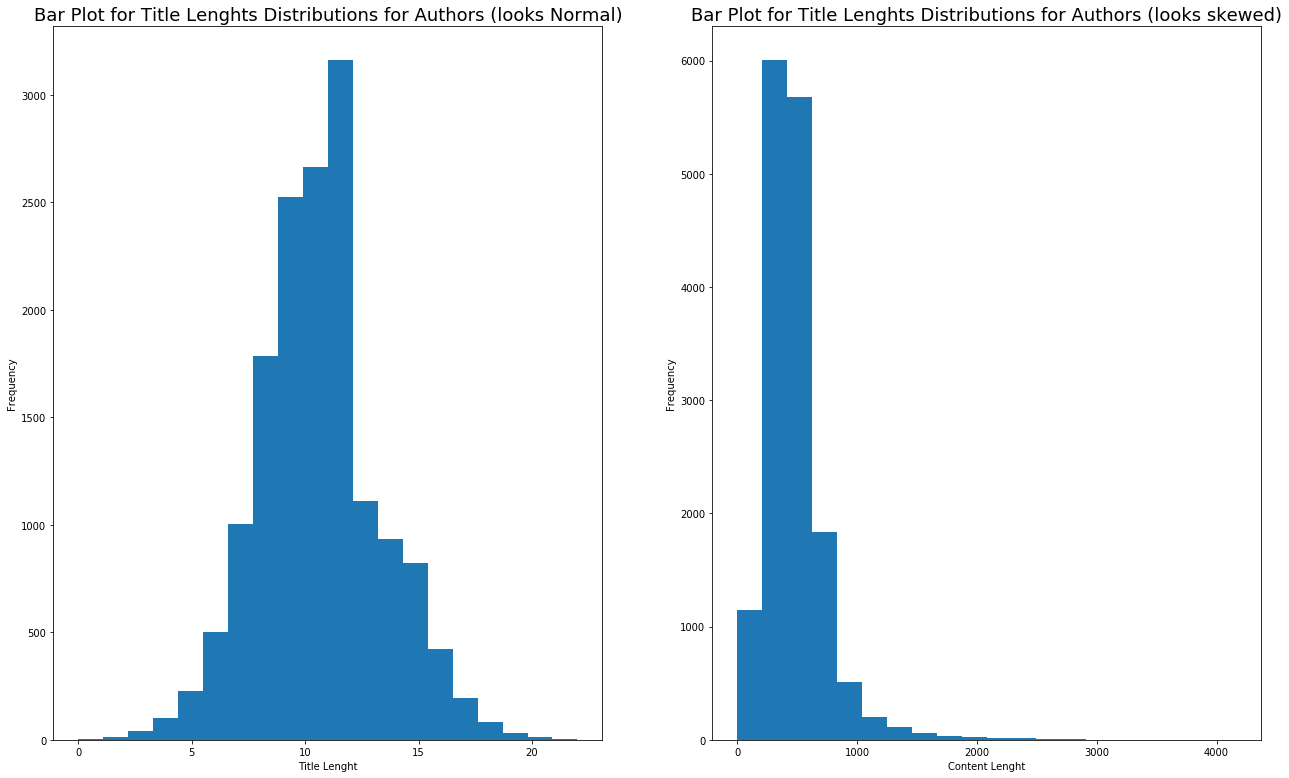

In [55]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(17.5, 10.5)
fig.tight_layout()
fig.subplots_adjust(hspace = 0.2, wspace = 0.2)

author_title_df.sort_values('mean',ascending=False)['mean'].plot(kind='hist',bins=20, ax=axes[0])
axes[0].set_xlabel('Title Lenght')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Bar Plot for Title Lenghts Distributions for Authors (looks Normal)', fontsize=18)

top_author_content_df.sort_values('mean',ascending=False)['mean'].plot(kind='hist',bins=20, ax=axes[1])
axes[1].set_xlabel('Content Lenght')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Bar Plot for Title Lenghts Distributions for Authors (looks skewed)', fontsize=18)

In [60]:
top_author_content_df.sort_values('mean',ascending=False)['mean']

author
Gideon Lewis-Kraus                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 4163.0
Breitbart News, Breitbart News, Breitbart News, Joel B. Pollak, Amanda House, John Hayward, Ezra Dulis, Breitbart News, Breitbart News, Breitbart News, Breitbart News, Breitbart News, Breitbart News, Katie McHugh, Dustin Stockton, Joel B. Pollak, Joel B. Pollak, John Hayward, Breitbart News, Breitbart News, Alex Swoyer, Kathe

Text(130.625,0.5,'Frequency')

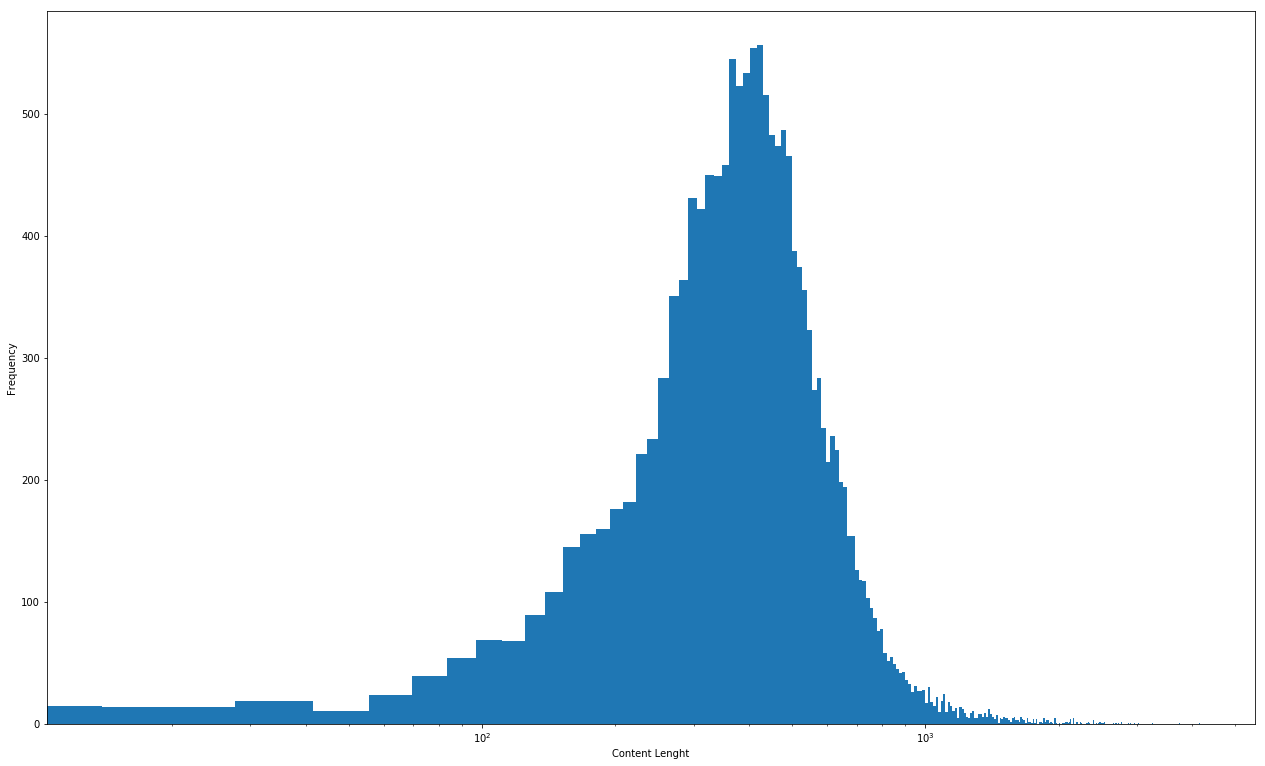

In [70]:
fig, axes = plt.subplots(1, 1)
fig.set_size_inches(17.5, 10.5)
fig.tight_layout()
fig.subplots_adjust(hspace = 0.2, wspace = 0.2)

top_author_content_df.sort_values('mean',ascending=False)['mean'].plot(kind='hist',bins=300, ax=axes)
axes.set_xscale('log')
axes.set_xlabel('Content Lenght')
axes.set_ylabel('Frequency')

#### Outlier Detection

In [83]:
# Removing adverstisement or weird contents
outliers = train[train.content_count<8]
print(outliers.shape)
outliers.content

(221, 7)


3823                                                   No.
10156                                        advertisement
13009                                        advertisement
15467                               From the Daily Mail:  
15721                                        advertisement
16256                                        advertisement
16723                                        advertisement
18344                                        advertisement
18372                                        advertisement
19020                                        advertisement
19303                                        advertisement
19802                              The Daily Mail reports:
20083                                        advertisement
21435                                        advertisement
21751                                        advertisement
21869                                        advertisement
22175                                        advertiseme

In [84]:
train = train[train.content_count>=8]
train.shape

(142349, 7)

## tf-idf Analysis

In [157]:
# With stop words
tf_idf_vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=True, ngram_range=(1,3), stop_words=None, min_df=0.0005)
tf_idf_matrix = tf_idf_vectorizer.fit_transform(train.title.tolist())

X = tf_idf_matrix.todense()
print(X.shape)

pca_num_components = 2
pca_function = PCA(n_components=pca_num_components)
reduced_data = pca_function.fit_transform(X)
reduced_data.shape

(142349, 3927)


(142349, 2)

In [104]:
hashes = [each for each in zip(list(range(len(train.publication.unique().tolist()))),train.publication.unique().tolist())]
hashes = {b:a for a,b in hashes}
hashes

{'New York Times': 0,
 'Breitbart': 1,
 'CNN': 2,
 'Business Insider': 3,
 'Atlantic': 4,
 'Fox News': 5,
 'Talking Points Memo': 6,
 'Buzzfeed News': 7,
 'National Review': 8,
 'New York Post': 9,
 'Guardian': 10,
 'NPR': 11,
 'Reuters': 12,
 'Vox': 13,
 'Washington Post': 14}

In [117]:
num_categories = len(set(train.publication.tolist()))

# colors = [viridis(float(hashes[i])/num_categories) for i in train.publication.tolist()]
train['publication_color'] = [hashes[i] for i in train.publication.tolist()]
train.head()

/anaconda3/envs/muteferrika/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,id,title,publication,author,content,title_count,content_count,publication_color
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,WASHINGTON — Congressional Republicans have...,14,422,0
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,"After the bullet shells get counted, the blood...",16,1673,0
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,"When Walt Disney’s “Bambi” opened in 1942, cri...",16,1071,0
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,"Death may be the great equalizer, but it isn’t...",14,1127,0
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,"SEOUL, South Korea — North Korea’s leader, ...",16,335,0


In [146]:
num_categories = len(set(train.publication.tolist()))

colors = [viridis(float(hashes[i])/num_categories) for i in train.publication.tolist()]
train['publication_color'] = colors

/anaconda3/envs/muteferrika/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [147]:
train.publication.unique().tolist()

['New York Times',
 'Breitbart',
 'CNN',
 'Business Insider',
 'Atlantic',
 'Fox News',
 'Talking Points Memo',
 'Buzzfeed News',
 'National Review',
 'New York Post',
 'Guardian',
 'NPR',
 'Reuters',
 'Vox',
 'Washington Post']

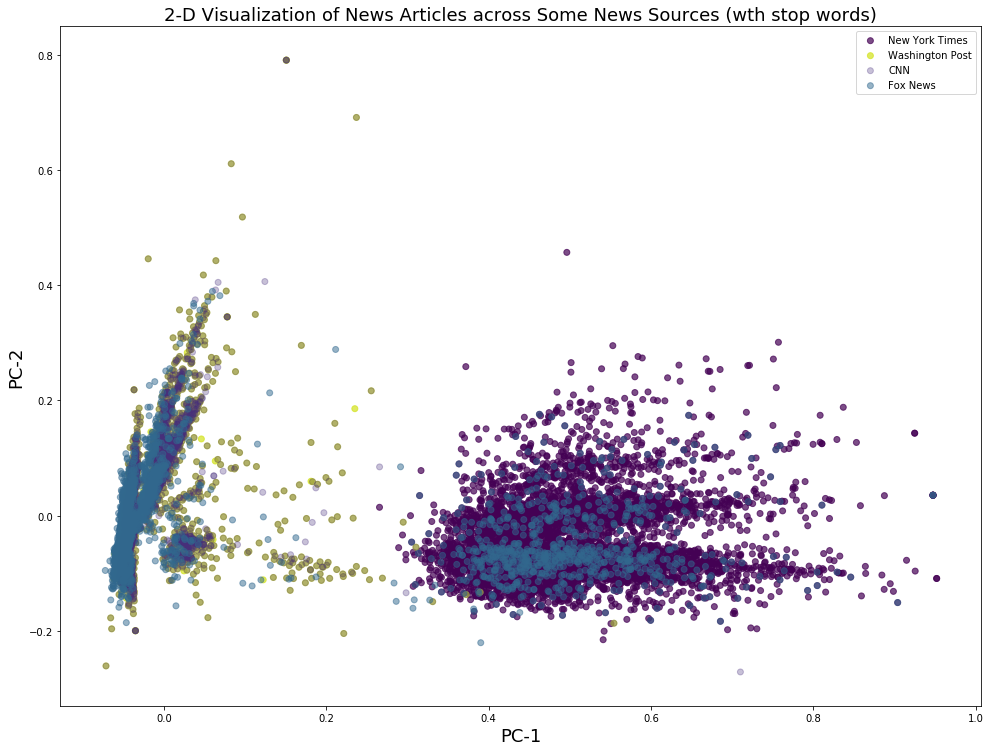

In [158]:
fig = plt.figure(figsize=(16.5, 12.5))

# for source in train.publication.unique().tolist():
subset = train[train.publication=='New York Times']
plt.scatter(reduced_data[subset.index.tolist(),0],reduced_data[subset.index.tolist(),1],
             c=subset.publication_color.tolist(),alpha=.7)

subset = train[train.publication=='Washington Post']
plt.scatter(reduced_data[subset.index.tolist(),0],reduced_data[subset.index.tolist(),1],
             c=subset.publication_color.tolist(),alpha=.7)

subset = train[train.publication=='CNN']
plt.scatter(reduced_data[subset.index.tolist(),0],reduced_data[subset.index.tolist(),1],
             c=subset.publication_color.tolist(),alpha=.3)

subset = train[train.publication=='Fox News']
plt.scatter(reduced_data[subset.index.tolist(),0],reduced_data[subset.index.tolist(),1],
             c=subset.publication_color.tolist(),alpha=.5)
#     break
plt.xlabel('PC-1', fontsize=18)
plt.ylabel('PC-2', fontsize=18)
plt.legend(['New York Times','Washington Post','CNN','Fox News'])
plt.title('2-D Visualization of News Articles across Some News Sources (wth stop words)', fontsize=18)
plt.show()

In [154]:
# Without stop words
tf_idf_vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=True, ngram_range=(1,3), stop_words=stop, min_df=0.0005)
tf_idf_matrix = tf_idf_vectorizer.fit_transform(train.title.tolist())

X = tf_idf_matrix.todense()
print(X.shape)

pca_num_components = 2
pca_function = PCA(n_components=pca_num_components)
reduced_data = pca_function.fit_transform(X)
reduced_data.shape

(142349, 3055)


(142349, 2)

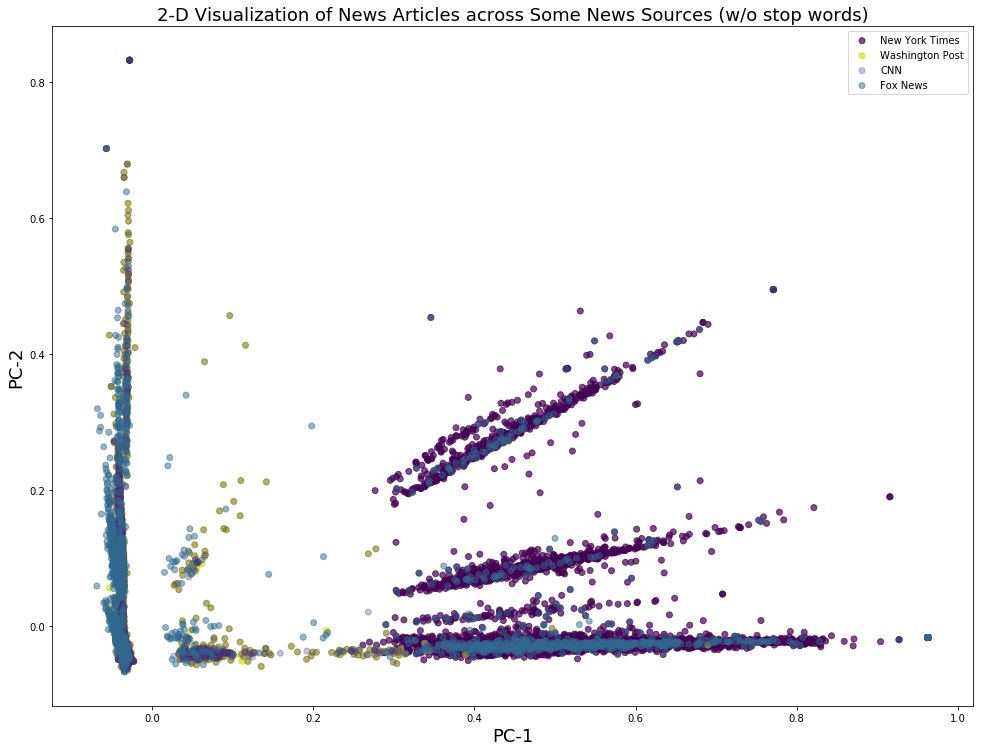

In [156]:
fig = plt.figure(figsize=(16.5, 12.5))

# for source in train.publication.unique().tolist():
subset = train[train.publication=='New York Times']
plt.scatter(reduced_data[subset.index.tolist(),0],reduced_data[subset.index.tolist(),1],
             c=subset.publication_color.tolist(),alpha=.7)

subset = train[train.publication=='Washington Post']
plt.scatter(reduced_data[subset.index.tolist(),0],reduced_data[subset.index.tolist(),1],
             c=subset.publication_color.tolist(),alpha=.7)

subset = train[train.publication=='CNN']
plt.scatter(reduced_data[subset.index.tolist(),0],reduced_data[subset.index.tolist(),1],
             c=subset.publication_color.tolist(),alpha=.3)

subset = train[train.publication=='Fox News']
plt.scatter(reduced_data[subset.index.tolist(),0],reduced_data[subset.index.tolist(),1],
             c=subset.publication_color.tolist(),alpha=.5)
#     break
plt.xlabel('PC-1', fontsize=18)
plt.ylabel('PC-2', fontsize=18)
plt.legend(['New York Times','Washington Post','CNN','Fox News'])
plt.title('2-D Visualization of News Articles across Some News Sources (w/o stop words)', fontsize=18)
plt.show()